In [ ]:
Задание 1**
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [2]:
import pandas as pd
data=pd.read_csv('ratings.csv','r', delimiter=',')
data.head()
                                  
#Решение1: принимает весь датафрейм - отрабатвает быстрее, чем если передавать в функцию построчно
def raiting_class_simple(some_data):
    ls=[]
    for line in data.rating:
        if line>=4.5:
            ls.append('высокий рейтинг')
        elif 2<line<4.5:
            ls.append('средний рейтинг')
        elif line<=2:
            ls.append('низкий рейтинг')
    data['class']=ls
    #data.loc[100:110]
    return data

data2=raiting_class_simple(data)
data2.loc[100:110]

,userId,movieId,rating,timestamp,class
100,4,255,0.5,1113796828,низкий рейтинг
101,4,256,2.5,1127946576,средний рейтинг
102,4,260,4.5,1127947466,высокий рейтинг
103,4,267,3.5,1114050525,средний рейтинг
104,4,288,4.5,1113767252,высокий рейтинг
105,4,292,3.5,1113767157,средний рейтинг
106,4,293,4.5,1113795816,высокий рейтинг
107,4,296,5.0,1113767056,высокий рейтинг
108,4,315,2.0,1113796665,низкий рейтинг
109,4,316,5.0,1113767120,высокий рейтинг


In [ ]:
#Решение2: передает в функцию построчно
data=pd.read_csv('ratings.csv','r', delimiter=',')
data.head()

def raiting_class(row):
    if row.rating>=4.5:
        return 'высокий рейтинг'
    elif 2<row.rating<4.5:
        return 'средний рейтинг'
    elif row.rating<=2:
        return 'низкий рейтинг'
        
data['class2']=data.apply(raiting_class, axis=1)
data.loc[100:110]

In [ ]:
Задание 2
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. 
Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

1
2
3
4
5
'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [15]:
import pandas as pd
data = pd.read_csv('keywords.csv')
#data.head()
    
    # создаем функцию с 3 вариантами регоинов и 1 вариантом по умолчанию
def geo_cl(row):
    if 'москва' in row['keyword'] or 'тула' in row['keyword'] or 'ярославль' in row['keyword']:
        return 'Центр'
    elif 'петербург' in row['keyword'] or 'псков' in row['keyword'] or 'псков' in row['keyword']:
        return 'Северо-Запад'
    elif 'владивосток' in row['keyword'] or 'сахалин' in row['keyword'] or 'хабаровск' in row['keyword']:
        return 'Дальний Восток'
    else:
        return 'undefined'
    
# прогоняем функцию с помощью апплай
data['region'] = data.apply(geo_cl, axis=1)
    
# проверяем, сколько значений, отличных от 'undefined', получилось в итоге
data['region'].value_counts()

undefined         99281
Центр               387
Северо-Запад        238
Дальний Восток       94
Name: region, dtype: int64

In [ ]:
Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл movies.csv и ratings.csv из базы grouplens.org.../movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

Matplotlib is building the font cache; this may take a moment.
C:\Users\KK\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


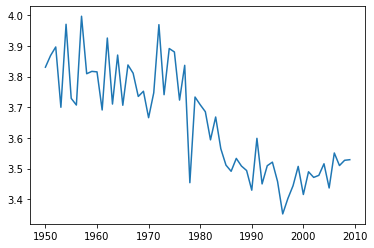

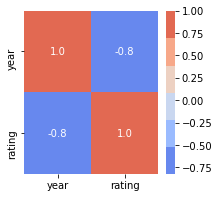

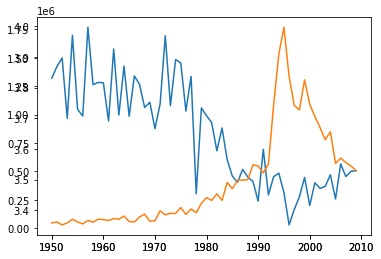

<AxesSubplot:>

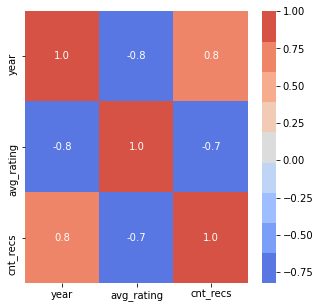

In [16]:
#загрузим нужные данные
data_ratings=pd.read_csv('ratings.csv', 'r', delimiter=',')
data_movies=pd.read_csv('movies.csv', 'r', delimiter=',')

#создадим функцию, которая будет проверять год в названии фильма и все значения в диапазоне 1950-2010 отмечать соответствущим 
#годом, остальные отмечать как 1900
def production_year(film):
    years=range(1950,2010)
    val=[yr for yr in years if str(yr) in film['title']]
    if val:
        return val[0]
    else:
        return 1900
        
#запишем в новый столбец года, которые распределила функция
data_movies['year']=data_movies.apply(production_year, axis=1)


#объединим два датафрейма, чтобы посчитать средний рейтинг по группировке года
joined=data_movies.merge(data_ratings, on='movieId', how='left')
jd=joined.groupby('year').rating.mean().reset_index()
jd.sort_values('rating', ascending=False)

#на самом деле плохо видно, но средний рейтинг действитетельно ухудшается на новые фильмы, на графике нагляднее
#исключим 1900 год не только для удобства, но и т.к. он содержит одновременно данные 
#о совсем старых (<1950) и одновременно об очень новых фильмах (>2010) помимо фильмов без года
jd_excl1900=jd[jd['year']!=1900] 
import matplotlib.pyplot as plt
plt.plot(jd_excl1900['year'], jd_excl1900['rating'])

#также чтобы полностью убедиться в этом, посмотрим на линейную зависимость между значением года и средним рейтингом
import seaborn as sns
f, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(jd_excl1900.corr(), annot=True, fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm', 6))
#видим довольно сильную отрицательную зависимость (коэффициент корреляции -0,8), т.е. с ростом года выпуска в среднем 
#фильмы действительно получают более низкую оценку зрителей


#ДОПОЛНИТЕЛЬНО ОТ СЕБЯ
#есть мысль, что такая зависимость обусловлена тем, что более ранние фильмы пересматривает все меньше людей и ввиду 
#этого меньше появляется хэйтеров, опускающих рейтинги
#подтянем также количество записей о выставленных рейтингах по году, исключив 1900, и также 
jd2=joined.groupby('year').agg({'rating':'mean', 'movieId':'count'}).reset_index()
jd2_excl1900=jd2[jd2['year']!=1900]
#для удобства переименуем заголовки
jd2_excl1900.rename(columns={'rating': 'avg_rating', 'movieId': 'cnt_recs'}, inplace=True)

#видим, что на графике видно, как при росте количества записей об отзывах(оранжевый) падает средний рейтинг(синий), 
#это происходит с приближением даты выпуска к 2010му году 

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax.plot(jd2_excl1900['year'], jd2_excl1900['avg_rating'], color="C0")
ax2.plot(jd2_excl1900['year'], jd2_excl1900['cnt_recs'], color="C1")
plt.show()

#коэффициенты корреляции также доказывают, что есть обратная зависимость от количества отзывов и рейтингом (-0,7) по году
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(jd2_excl1900.corr(), annot=True, fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm',9))
#уверен, есть зависимость между возрастом пользователей и отметками фильмам, скажем чем старше человек, тем меньше его 
#можно зацепить новой историей, так как все подобное он уже видел, а впечатлительная молодежь составляет меньшую долю 
#в общем количестве оценок и их хорошие оценки тонут, подавленные основной циничной массой отзывов :) а может и нет
#к сожалению соответствующих данных нет, чтобы проверить